In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("HousePrices.csv")
df.shape

(20, 3)

In [ ]:
# Gradient Descent - total error for all records is calculated and then weights are adjusted
# Stochastic Gradient Descent - error for sample record is calculated and then weights are adjusted
# Gradient Descent - total error for some sample (10) records is calculated and then weights are adjusted

In [4]:
print(df.columns)

Index(['area', 'bedrooms', 'price'], dtype='object')


In [29]:
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [10]:
X = df[['area', 'bedrooms']]
y = df['price']

In [25]:
print(type(y))
print(type(y.to_numpy()))
print(y.to_numpy().reshape(-1,1))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[[ 39.07]
 [120.  ]
 [ 62.  ]
 [ 75.  ]
 [ 51.  ]
 [ 38.  ]
 [135.  ]
 [155.  ]
 [ 50.  ]
 [167.  ]
 [ 82.  ]
 [140.  ]
 [ 38.  ]
 [ 40.  ]
 [101.  ]
 [ 42.  ]
 [ 48.  ]
 [ 60.  ]
 [102.  ]
 [ 32.  ]]


In [28]:
from sklearn.preprocessing import MinMaxScaler
# Scaling

sx = MinMaxScaler()
sy = MinMaxScaler()

X_scaled = sx.fit_transform(X)
y_scaled = sy.fit_transform(y.to_numpy().reshape(-1,1))

X_scaled, y_scaled

(array([[0.08827586, 0.25      ],
        [0.62068966, 0.75      ],
        [0.22068966, 0.5       ],
        [0.24862069, 0.5       ],
        [0.13793103, 0.25      ],
        [0.12758621, 0.25      ],
        [0.6662069 , 0.75      ],
        [0.86206897, 0.75      ],
        [0.17586207, 0.5       ],
        [1.        , 1.        ],
        [0.34482759, 0.5       ],
        [0.68448276, 0.75      ],
        [0.06896552, 0.25      ],
        [0.10344828, 0.25      ],
        [0.5       , 0.5       ],
        [0.12931034, 0.25      ],
        [0.13103448, 0.5       ],
        [0.25517241, 0.5       ],
        [0.67931034, 0.5       ],
        [0.        , 0.        ]]),
 array([[0.05237037],
        [0.65185185],
        [0.22222222],
        [0.31851852],
        [0.14074074],
        [0.04444444],
        [0.76296296],
        [0.91111111],
        [0.13333333],
        [1.        ],
        [0.37037037],
        [0.8       ],
        [0.04444444],
        [0.05925926],
        [0

In [95]:
print(sy.inverse_transform([[1,0.5]]))

[[167.   99.5]]


In [35]:
# equation y_pred=w1*area+w2*bedrooms+bias

X_scaled.shape
w = np.ones(shape=(2))
np.dot(X,w)

array([1058., 2604., 1443., 1524., 1202., 1172., 2736., 3304., 1313.,
       3705., 1803., 2789., 1002., 1102., 2253., 1177., 1183., 1543.,
       2773.,  801.])

In [90]:
# concept check
A = np.array([[1,2],[3,4]])
B = np.array([10,20])

print(A*B+2) # broadcast
print("========================")
print(np.dot(A,B))
print(np.log([0.0001,1,2,10]))

[[12 42]
 [32 82]]
[ 50 110]
[-9.21034037  0.          0.69314718  2.30258509]


In [89]:
print(y_scaled) # 2D aaray
print(y_scaled.flatten()) # 1D array

[[0.05237037]
 [0.65185185]
 [0.22222222]
 [0.31851852]
 [0.14074074]
 [0.04444444]
 [0.76296296]
 [0.91111111]
 [0.13333333]
 [1.        ]
 [0.37037037]
 [0.8       ]
 [0.04444444]
 [0.05925926]
 [0.51111111]
 [0.07407407]
 [0.11851852]
 [0.20740741]
 [0.51851852]
 [0.        ]]
[0.05237037 0.65185185 0.22222222 0.31851852 0.14074074 0.04444444
 0.76296296 0.91111111 0.13333333 1.         0.37037037 0.8
 0.04444444 0.05925926 0.51111111 0.07407407 0.11851852 0.20740741
 0.51851852 0.        ]


In [88]:
def batch_gradient_descent(X,y_true, epochs, learning_rate):
    total_samples = X.shape[0]
    num_features = X.shape[1]
    w = np.ones(shape=(num_features)) #initial weights
    #print(w)
    b=0 #bias
    #print(y_true)
    #print(y_true.shape)
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_pred = np.dot(X,w) + b
        #print(y_pred)
        #print(y_pred.shape)
        
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_pred))
        b_grad = -(2/total_samples)*np.sum(y_true-y_pred)
        #print(w_grad.shape)
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_pred)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(X_scaled,y_scaled.flatten(),500,0.01)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

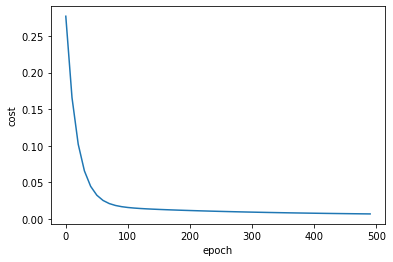

In [93]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [154]:
w,b

(array([0.70712464, 0.67456527]), -0.23034857438407427)

In [158]:
def predict(X, w, b):
    X_scaled=sx.transform(X)
    y_scaled_pred = np.dot(X_scaled,w.T)+b
    return sy.inverse_transform([y_scaled_pred])
    
y_pred = predict([[2600,4]],w,b)
print(y_pred,y[1])

[[128.45484403]] 120.0
